Name : Vansh Kolte

Roll_no : 62

Practical : 6B

In [12]:
# Import necessary libraries
import zipfile
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

In [14]:
import zipfile

zip_path = "/content/archive (1).zip"  # Path to your ZIP file
extract_path = "/content/FruitsClassification"  # Destination folder

# Check if the file is a valid ZIP file before extracting
if zipfile.is_zipfile(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("\n✅ Dataset extracted successfully!")
else:
    print("\n⚠️ Error: The file is not a valid ZIP archive. Please check the file or re-download it.")



⚠️ Error: The file is not a valid ZIP archive. Please check the file or re-download it.


In [ ]:
# Define dataset paths
train_dir = '/content/fruits_data/FruitsClassification/Fruits Classification/train'
test_dir = '/content/fruits_data/FruitsClassification/Fruits Classification/test'

In [ ]:
fruit_classes = os.listdir(train_dir)  # List of fruit categories
print(fruit_classes)

['Strawberry', 'Grape', 'Banana', 'Mango', 'Apple']


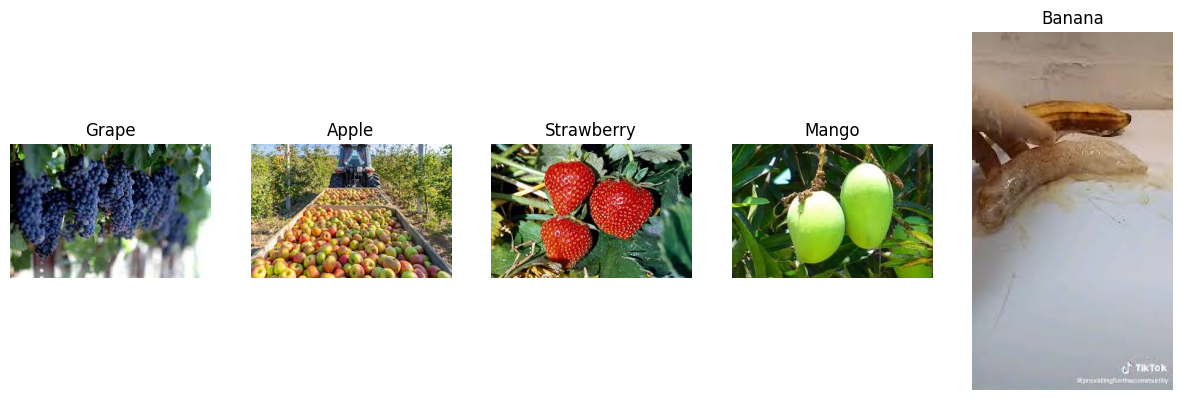

In [ ]:
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

# Define test dataset path
test_dir = "/content/fruits_data/FruitsClassification/Fruits Classification/train"

# Select 5 random classes
sample_classes = random.sample(os.listdir(test_dir), min(5, len(os.listdir(test_dir))))

# Plot images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))  # 1 row, 5 columns
for ax, fruit in zip(axes, sample_classes):
    img_path = os.path.join(test_dir, fruit, random.choice(os.listdir(os.path.join(test_dir, fruit))))
    ax.imshow(Image.open(img_path))
    ax.set_title(fruit)
    ax.axis("off")

plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 3: Data Preprocessing & Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # ✅ Fix: Resize images properly
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb'  # ✅ Fix: Ensure 3-channel RGB images
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # ✅ Fix: Resize images properly
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb'  # ✅ Fix: Ensure 3-channel RGB images
)


Found 9700 images belonging to 5 classes.
Found 9700 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Step 4: Define the CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(244, 244, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer with softmax activation
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model Summary
model.summary()

# Step 5: Train the Model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,277,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,403,845 (12.98 MB)

 Trainable params: 3,403,845 (12.98 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 48s 137ms/step - accuracy: 0.3029 - loss: 1.5149 - val_accuracy: 0.4610 - val_loss: 1.2025
Epoch 2/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 41s 134ms/step - accuracy: 0.4553 - loss: 1.2655 - val_accuracy: 0.5211 - val_loss: 1.1284
Epoch 3/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 37s 121ms/step - accuracy: 0.5036 - loss: 1.1809 - val_accuracy: 0.5557 - val_loss: 1.0480
Epoch 4/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 37s 123ms/step - accuracy: 0.5454 - loss: 1.0821 - val_accuracy: 0.5846 - val_loss: 0.9970
Epoch 5/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 37s 122ms/step - accuracy: 0.5603 - loss: 1.0568 - val_accuracy: 0.6161 - val_loss: 0.9530
Epoch 6/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 37s 122ms/step - accuracy: 0.5926 - loss: 1.0243 - val_accuracy: 0.6453 - val_loss: 0.8991
Epoch 7/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 38s 124ms/step - accuracy: 0.6101 - loss: 0.9824 - val_accuracy: 0.6497 - val_loss: 0.8827
Epoch 8/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 38s 125ms/step - accuracy: 0.6121 - loss: 0

In [ ]:
# Step 7: Evaluate the Model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")

304/304 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.6714 - loss: 0.8423
Test Accuracy: 66.54%


In [ ]:
# Function to build transfer learning models
def build_transfer_learning_model(base_model):
    base_model.trainable = False
    inputs = base_model.input
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize VGG19 and ResNet50 models
vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build transfer learning models
vgg19_model = build_transfer_learning_model(vgg19_base)
resnet50_model = build_transfer_learning_model(resnet50_base)

In [ ]:
# Train VGG19 Model
print("\nTraining VGG19 Model...")
vgg19_history = vgg19_model.fit(train_generator, epochs=10, validation_data=test_generator)



Training VGG19 Model...
Epoch 1/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 219s 665ms/step - accuracy: 0.2261 - loss: 1.7306 - val_accuracy: 0.4958 - val_loss: 1.4339
Epoch 2/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 194s 638ms/step - accuracy: 0.3749 - loss: 1.4714 - val_accuracy: 0.5630 - val_loss: 1.2427
Epoch 3/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 211s 693ms/step - accuracy: 0.4689 - loss: 1.3245 - val_accuracy: 0.6109 - val_loss: 1.0983
Epoch 4/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 193s 636ms/step - accuracy: 0.5401 - loss: 1.1980 - val_accuracy: 0.6257 - val_loss: 1.0222
Epoch 5/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 194s 638ms/step - accuracy: 0.5547 - loss: 1.1437 - val_accuracy: 0.6435 - val_loss: 0.9706
Epoch 6/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 194s 638ms/step - accuracy: 0.5859 - loss: 1.0686 - val_accuracy: 0.6633 - val_loss: 0.9097
Epoch 7/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 194s 639ms/step - accuracy: 0.5976 - loss: 1.0405 - val_accuracy: 0.6726 - val_loss: 0.8848
Epoch 8/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/st

In [ ]:
# Train ResNet50 model
print("\nTraining ResNet50 Model...")
resnet50_history = resnet50_model.fit(train_generator, epochs=5, validation_data=test_generator)
